<a href="https://colab.research.google.com/github/starcell/sejong-ml/blob/main/boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import pandas as pd
# !pip install -U scikit-learn
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# iris_dataset = datasets.load_iris()
# print(type(iris_dataset))
# print(iris_dataset.DESCR)

In [74]:
# dataset = datasets.load_boston()

In [75]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# target = raw_df.values[1::2, 2]


raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

In [76]:
data_df = pd.DataFrame(data)

In [77]:
data_df.columns = [
  'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

In [78]:
data_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [79]:
data_df.shape

(506, 14)

In [80]:
data_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [81]:
x_data = data_df.iloc[:, :-1]
y_data = data_df.iloc[:, -1:]

In [82]:
x_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [83]:
y_data

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [84]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.3)

In [85]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
505,0.04741,0.0,11.93,0.0,0.5730,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88
466,3.77498,0.0,18.10,0.0,0.6550,5.952,84.7,2.8715,24.0,666.0,20.2,22.01,17.15
400,25.04610,0.0,18.10,0.0,0.6930,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77
147,2.36862,0.0,19.58,0.0,0.8710,4.926,95.7,1.4608,5.0,403.0,14.7,391.71,29.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.13960,0.0,8.56,0.0,0.5200,6.167,90.0,2.4210,5.0,384.0,20.9,392.69,12.33
20,1.25179,0.0,8.14,0.0,0.5380,5.570,98.1,3.7979,4.0,307.0,21.0,376.57,21.02
18,0.80271,0.0,8.14,0.0,0.5380,5.456,36.6,3.7965,4.0,307.0,21.0,288.99,11.69
95,0.12204,0.0,2.89,0.0,0.4450,6.625,57.8,3.4952,2.0,276.0,18.0,357.98,6.65


In [86]:
y_train

,MEDV
505,11.9
204,50.0
466,19.0
400,5.6
147,14.6
...,...
104,20.1
20,13.6
18,20.2
95,28.4


In [87]:
estimator = LinearRegression()

In [88]:
estimator.fit(x_train, y_train)

LinearRegression()

In [89]:
y_predict = estimator.predict(x_train) 

In [90]:
score = metrics.r2_score(y_train, y_predict)
print(score) #1.0

0.7332141481005707


In [91]:
y_predict = estimator.predict(x_test) 
test_score = metrics.r2_score(y_test, y_predict)
print(test_score) #1.0

0.7251516525325696


https://aigaeddo.tistory.com/15

r2_score가 1에 가까우면 쓸모있는 회귀식

In [92]:
# Correlation Matrix
# 상관관계 행렬 계산
corr_matrix = data_df.corr()

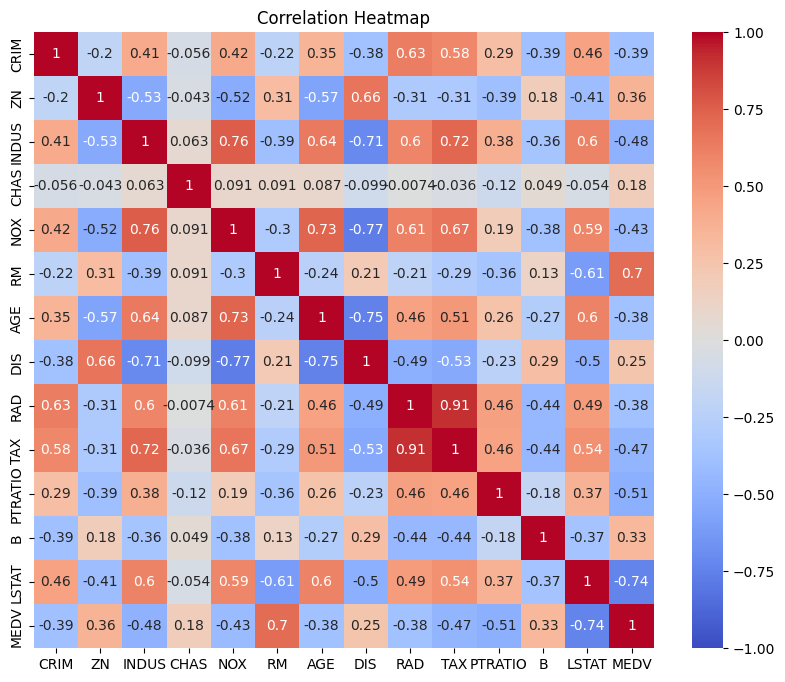

In [93]:
# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='RM', ylabel='MEDV'>

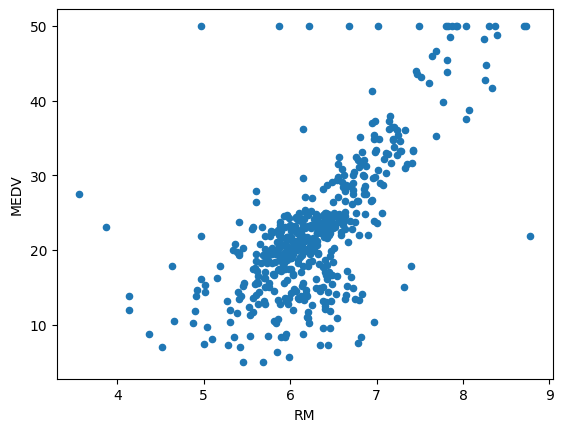

In [94]:
data_df.plot.scatter(x='RM', y='MEDV')

<Axes: xlabel='LSTAT', ylabel='MEDV'>

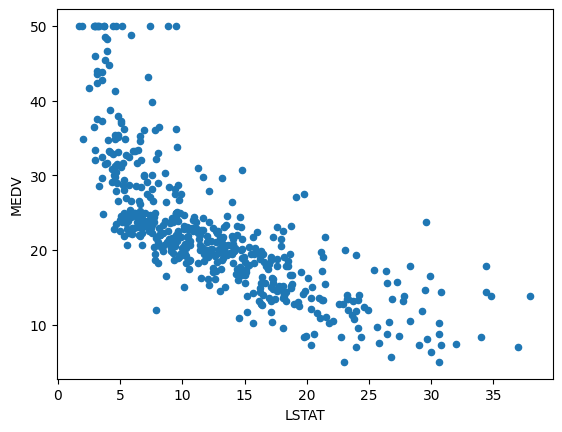

In [95]:
data_df.plot.scatter(x='LSTAT', y='MEDV')

In [96]:
new_data_df = data_df[['RM', 'LSTAT', 'MEDV']]

In [97]:
new_data_df

,RM,LSTAT,MEDV
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2
...,...,...,...
501,6.593,9.67,22.4
502,6.120,9.08,20.6
503,6.976,5.64,23.9
504,6.794,6.48,22.0


In [98]:
new_x_data = new_data_df.iloc[:, :-1]
new_y_data = new_data_df.iloc[:, -1:]

n_x_train, n_x_test, n_y_train, n_y_test = model_selection.train_test_split(new_x_data, new_y_data, test_size=0.3)

In [99]:
n_x_train

,RM,LSTAT
174,5.859,9.64
470,6.167,16.29
495,5.670,17.60
187,6.782,6.68
478,6.185,18.03
...,...,...
431,6.833,19.69
339,5.985,9.74
397,5.747,19.92
467,6.003,21.32


In [100]:
n_y_train

,MEDV
174,22.6
470,19.9
495,23.1
187,32.0
478,14.6
...,...
431,14.1
339,19.0
397,8.5
467,19.1


In [101]:
new_estimator = LinearRegression()

In [102]:
new_estimator.fit(n_x_train, n_y_train)

LinearRegression()

In [103]:
n_y_predict = new_estimator.predict(n_x_train) 

In [104]:
n_score = metrics.r2_score(n_y_train, n_y_predict)
print(n_score) #1.0

0.60490559793017


In [105]:
n_y_test_predict = new_estimator.predict(n_x_test) 
n_test_score = metrics.r2_score(n_y_test, n_y_test_predict)
print(n_test_score) #1.0

0.6996091468260883
